# DATA CLEANING 

In [1]:
#Replacement of unknown Height, Weight, Age as well as replacement of duplicates of NOC regions 

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

data=pd.read_csv('athlete_events.csv')
j=pd.read_csv('athlete_events.csv')




###########################################################################################################################
#Our team found some countries for which multiple NOC names were used for example, for australia,NOC names like ANZ and AUS
#so we chose one of those duplicates and replcae the others.
###########################################################################################################################

data_NOC_unique=data['NOC'].unique()

data_countries=pd.DataFrame(data['Team'])

data['NOC']=data['NOC'].replace(['RUS','URS'],'EUN')

data['NOC']=data['NOC'].replace('ANZ','AUS')

data['NOC']=data['NOC'].replace('NFL','CAN')

data['NOC']=data['NOC'].replace('HKG','CHN')

data['NOC']=data['NOC'].replace('UAR','SYR')

data['NOC']=data['NOC'].replace(['SCG','YUG'],'SRB')

data['NOC']=data['NOC'].replace(['MAS','NBO'],'MAL')

data['NOC']=data['NOC'].replace(['BOH','TCH'],'CZE')

data['NOC']=data['NOC'].replace('CRT','GRE')

data['NOC']=data['NOC'].replace(['FRG','GDR','SAA'],'GER')

data['NOC']=data['NOC'].replace('WIF','TTO')

data['NOC']=data['NOC'].replace('VNM','VIE')

data['NOC']=data['NOC'].replace(['YAR','YMD'],'YEM')

data['NOC']=data['NOC'].replace('SIN','SGP')

data['NOC']=data['NOC'].replace('RHO','ZIM')

data['NOC']=data['NOC'].replace(['ROT','TUV'],'UNK')


############################################################################################################################
############################################################################################################################

data=data.drop(columns="Games")

#replacing Male with 1 and female 0

data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)

#replacing summer with 1 and winter with 0

data['Season']=data['Season'].replace('Summer',1)
data['Season']=data['Season'].replace('Winter',0)

#replacing gold with 1, silver with 2 , bronze with 3 , NaN with 0



data['Medal']=data['Medal'].replace('Gold',1)    
data['Medal']=data['Medal'].replace('Silver',2)
data['Medal']=data['Medal'].replace('Bronze',3)

data['Medal'] = data.Medal.fillna(0).astype(int)
data['Medal'] =data['Medal'].astype('category')

#replacing the unknown ages with the median age of all the atheletes that have taken part in the olympics. 

data['Age']=data.Age.fillna(24).astype(float)



#replacing the unknown heights and weights with 0 first and then replacing them wiht some desired numeric values.

data['Height']=data.Height.fillna(0)
data['Weight']=data.Weight.fillna(0)


#if both the height and weight are missing then they are replaced by the median height and weight of the whole dataset


data['Height'][(data['Height']==0)&(data['Weight']==0)&(data['Sex']==1)]=179
data['Height'][(data['Height']==0)&(data['Weight']==0)&(data['Sex']==0)]=168

#several lists have been created in the upcoming cells in order to find out the 25th 50th and 75th percentile of male and female atheletes separately.


data['Height'][(data['Weight']>=83)&(data['Height']==0)&(data['Sex']==1)]=185
data['Height'][(data['Weight']>=65)&(data['Height']==0)&(data['Sex']==0)]=173
data['Height'][(data['Weight']<=67)&(data['Height']==0)&(data['Sex']==1)]=172
data['Height'][(data['Weight']<=54)&(data['Height']==0)&(data['Sex']==0)]=162
data['Height'][(data['Weight']<83)&(data['Weight']>67)&(data['Height']==0)&(data['Sex']==1)]=179
data['Height'][(data['Weight']<65)&(data['Weight']>54)&(data['Height']==0)&(data['Sex']==0)]=168


data['Weight'][(data['Height']==0)&(data['Weight']==0)&(data['Sex']==1)]=74
data['Weight'][(data['Height']==0)&(data['Weight']==0)&(data['Sex']==0)]=59
data['Weight'][(data['Height']>=185)&(data['Weight']==0)&(data['Sex']==1)]=83
data['Weight'][(data['Height']>=173)&(data['Weight']==0)&(data['Sex']==0)]=65
data['Weight'][(data['Height']<=172)&(data['Weight']==0)&(data['Sex']==1)]=67
data['Weight'][(data['Height']<=162)&(data['Weight']==0)&(data['Sex']==0)]=54
data['Weight'][(data['Height']<185)&(data['Height']>172)&(data['Weight']==0)&(data['Sex']==1)]=74
data['Weight'][(data['Height']<173)&(data['Height']>162)&(data['Weight']==0)&(data['Sex']==0)]=59


#dropping some columns as they were not required in our exploratory data analysis as well as machine learning model.
data=data.drop(columns=['City','Event','Team'])

data['Season']=data['Season'].astype('category')


data['Sex']=data['Sex'].astype('category')

data['Year']=data['Year'].astype('category')

data['Sport']=data['Sport'].astype('category')

data['Sex']=data['Sex'].astype('category')

data_NOC=pd.read_csv('noc_regions.csv')
data_NOC_unique=data['NOC'].unique()
data.info()
data.head(100)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 11 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null category
Age       271116 non-null float64
Height    271116 non-null float64
Weight    271116 non-null float64
NOC       271116 non-null object
Year      271116 non-null category
Season    271116 non-null category
Sport     271116 non-null category
Medal     271116 non-null category
dtypes: category(5), float64(3), int64(1), object(2)
memory usage: 13.7+ MB


,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,CHN,1992,1,Basketball,0
1,2,A Lamusi,1,23.0,170.0,60.0,CHN,2012,1,Judo,0
2,3,Gunnar Nielsen Aaby,1,24.0,179.0,74.0,DEN,1920,1,Football,0
3,4,Edgar Lindenau Aabye,1,34.0,179.0,74.0,DEN,1900,1,Tug-Of-War,1
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,NED,1988,0,Speed Skating,0
5,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,NED,1988,0,Speed Skating,0
6,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,NED,1992,0,Speed Skating,0
7,5,Christine Jacoba Aaftink,0,25.0,185.0,82.0,NED,1992,0,Speed Skating,0
8,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,NED,1994,0,Speed Skating,0
9,5,Christine Jacoba Aaftink,0,27.0,185.0,82.0,NED,1994,0,Speed Skating,0


In [2]:

t=data['NOC'].unique()
t.sort()
len(t)
data.describe()
data.head(30)

std_weight_male=list()
std_height_male=list()
std_height_female=list()
std_weight_female=list()

for i in range(271116):
    if(data['Sex'][i]==1 and data['Height'][i]>0):
        std_height_male.append(data['Height'][i])
        
        
    if(data['Sex'][i]==1 and data['Weight'][i]>0):
        std_weight_male.append(data['Weight'][i])
        
    if(data['Sex'][i]==0 and data['Height'][i]>0):
        std_height_female.append(data['Height'][i])
        
    
    if(data['Sex'][i]==0 and data['Weight'][i]>0):
        std_weight_female.append(data['Weight'][i])
        
        
std_weight_male=pd.DataFrame(std_weight_male)
std_height_male=pd.DataFrame(std_height_male)
std_weight_female=pd.DataFrame(std_weight_female)
std_height_female=pd.DataFrame(std_height_female)


In [3]:
j['NOC'].nunique()
data.describe()

,ID,Age,Height,Weight
count,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.502493,175.855390,71.021895
std,39022.286345,6.287361,9.484064,12.825173
min,1.000000,10.000000,127.000000,25.000000
25%,34643.000000,22.000000,170.000000,62.000000
50%,68205.000000,24.000000,178.000000,73.000000
75%,102097.250000,28.000000,180.000000,76.000000
max,135571.000000,97.000000,226.000000,214.000000


In [4]:
k=data['Sport'].unique()
for i in range(66):
    print(k[i])

Basketball
Judo
Football
Tug-Of-War
Speed Skating
Cross Country Skiing
Athletics
Ice Hockey
Swimming
Badminton
Sailing
Biathlon
Gymnastics
Art Competitions
Alpine Skiing
Handball
Weightlifting
Wrestling
Luge
Water Polo
Hockey
Rowing
Bobsleigh
Fencing
Equestrianism
Shooting
Boxing
Taekwondo
Cycling
Diving
Canoeing
Tennis
Modern Pentathlon
Figure Skating
Golf
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Nordic Combined
Baseball
Rhythmic Gymnastics
Freestyle Skiing
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon
Ski Jumping
Curling
Snowboarding
Rugby
Short Track Speed Skating
Skeleton
Lacrosse
Polo
Cricket
Racquets
Motorboating
Military Ski Patrol
Croquet
Jeu De Paume
Roque
Alpinism
Basque Pelota
Aeronautics


In [5]:
data['Sport'].nunique()

66

In [6]:
std_weight_male.describe()

,0
count,196594.000000
mean,75.233532
std,11.260134
min,28.000000
25%,70.000000
50%,74.000000
75%,80.000000
max,214.000000


In [7]:
std_height_male.describe()

,0
count,196594.000000
mean,178.888018
std,8.010497
min,127.000000
25%,175.000000
50%,179.000000
75%,183.000000
max,226.000000


In [8]:
std_height_female.describe()

,0
count,74522.000000
mean,167.855117
std,8.348030
min,127.000000
25%,163.000000
50%,168.000000
75%,173.000000
max,213.000000


In [9]:
std_weight_female.describe()


,0
count,74522.000000
mean,59.911315
std,9.679232
min,25.000000
25%,54.000000
50%,59.000000
75%,65.000000
max,167.000000


In [10]:

data['Sport'].unique()

[Basketball, Judo, Football, Tug-Of-War, Speed Skating, ..., Jeu De Paume, Roque, Alpinism, Basque Pelota, Aeronautics]
Length: 66
Categories (66, object): [Basketball, Judo, Football, Tug-Of-War, ..., Roque, Alpinism, Basque Pelota, Aeronautics]

In [11]:
data_NOC_unique_array=[0 for i in range(207)]
data_sports_array=[0 for i in range(66)]

data_NOC_unique=data['NOC'].unique()
count=0
for count in range(207):
    data_NOC_unique_array[count]=count+1


count=0

for count in range(66):
    data_sports_array[count]=count+1

#replacing the NOC names wiht numeric values ofr classification

data['NOC']=data['NOC'].replace(data_NOC_unique,data_NOC_unique_array)
data['Medal']=data['Medal'].astype('category')


list_of_sports=['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota',
       'Aeronautics']



list_of_sports.sort()

#replacing the sports with numeric values for classificaction
data['Sport']=data['Sport'].replace(list_of_sports,data_sports_array)



In [ ]:

data_NOC_unique=data['NOC'].unique()
count=0
for i in range(271116):
    for k in range(207):
        if(data['NOC'][i]==data_NOC_unique[k] ):
            data_NOC_unique_array[k]+=1;
            continue
data_NOC_unique_array

In [12]:

#creating a list with 4 columns for encoding the medal list.
medals_won_by_different_teams=[[0 for x in range (4)]for y in range (271116)]
for i in range(271116):
    if(data['Medal'][i]==0):
        medals_won_by_different_teams[i][0]=1
    if(data['Medal'][i]==1):
        medals_won_by_different_teams[i][1]=1
    if(data['Medal'][i]==2):
        medals_won_by_different_teams[i][2]=1
    if(data['Medal'][i]==3):
        medals_won_by_different_teams[i][3]=1

In [13]:
medals_won_by_different_teams=pd.DataFrame(medals_won_by_different_teams,columns=['no medal','Gold','Silver','Bronze'])
medals_won_by_different_teams['no medal']=medals_won_by_different_teams['no medal'].astype('category')
medals_won_by_different_teams['Gold']=medals_won_by_different_teams['Gold'].astype('category')
medals_won_by_different_teams['Silver']=medals_won_by_different_teams['Silver'].astype('category')
medals_won_by_different_teams['Bronze']=medals_won_by_different_teams['Bronze'].astype('category')

In [14]:
#datset used as predictor
height_weight=pd.DataFrame(data[['Height','Weight','Sport','NOC','Age','Season','Sex']])

In [15]:
data['Medal']=data['Medal'].astype('category')

In [16]:
from sklearn.model_selection import train_test_split

height_weight_train, height_weight_test = train_test_split(height_weight[['Height','Weight','Season','Age','Sport','NOC','Sex']] ,test_size=0.3)
medal_train, medal_test = train_test_split(medals_won_by_different_teams ,test_size=0.3)

In [17]:
import pickle

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.regularizers import l2


Using TensorFlow backend.


# Creation of the keras neural network model

In [18]:
#creating a function in order to define a keras neural network model
def model_nn():
    
    
    
    model = keras.models.Sequential()
    
    model.add(keras.layers.Dense(40, input_dim=7, activation='relu')) #input layer with relu activation
   
    model.add(keras.layers.Dense(40, activation='relu'))             #First hidden layer with relu activation
    
    model.add(keras.layers.Dense(4,activation='linear'))   #Ouput layer change units,batch size=20000 and 2 layers with 40 neurons
   
    
    
    model.compile(loss="mean_squared_error", optimizer="adam",metrics=['acc']) #model compilation with adam as an optimizer

    #we used validation split in order to validate the predictions while training it
    history=model.fit(height_weight_train,medal_train,epochs=45,validation_split=0.33,
    shuffle=True,
    verbose=1,batch_size=15000)
    
    prediction=model.predict(height_weight_test).flatten()
    print(prediction)
    print(model.summary())
    
    #for the training dataset
    error,accu=model.evaluate(height_weight_train,medal_train)
    
    
    print("The mean squared error (MSE) for the train data set is: {}".format(error))
    print("The Accuracy for the train data set is: {}".format(accu))
    
    
    print()
    
    
    #for the test dataset
    error_rate,accuracy = model.evaluate(height_weight_test, medal_test)
    print("The mean squared error (MSE) for the test data set is: {}".format(error_rate))
    print("The Accuracy for the test data set is: {}".format(accuracy))
    
    plt.plot(history.history['acc'])
   # plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
   # plt.plot(history.history['val_acc'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    
    return model

# Saving the model (in .h5 format) in order to use it in the telegram chatbot.

Train on 127153 samples, validate on 62628 samples
Epoch 1/45
127153/127153 [==============================] - 2s 16us/step - loss: 162.4299 - acc: 0.0492 - val_loss: 31.0232 - val_acc: 0.0486
Epoch 2/45
127153/127153 [==============================] - 1s 4us/step - loss: 25.6690 - acc: 0.1943 - val_loss: 26.4645 - val_acc: 0.3788
Epoch 3/45
127153/127153 [==============================] - 1s 4us/step - loss: 18.1134 - acc: 0.4148 - val_loss: 9.1347 - val_acc: 0.3348
Epoch 4/45
127153/127153 [==============================] - 1s 4us/step - loss: 6.8930 - acc: 0.2590 - val_loss: 5.0607 - val_acc: 0.2155
Epoch 5/45
127153/127153 [==============================] - 0s 4us/step - loss: 4.3650 - acc: 0.1946 - val_loss: 3.7357 - val_acc: 0.1658
Epoch 6/45
127153/127153 [==============================] - 1s 4us/step - loss: 3.3049 - acc: 0.2001 - val_loss: 2.6323 - val_acc: 0.3050
Epoch 7/45
127153/127153 [==============================] - 1s 4us/step - loss: 2.3037 - acc: 0.3676 - val_loss: 2

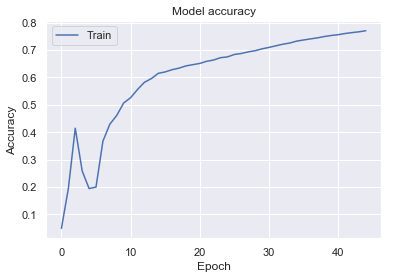

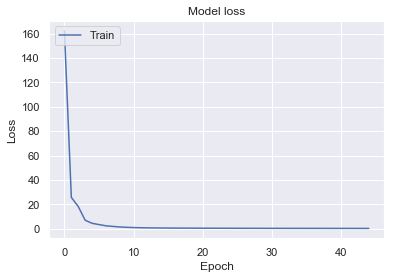

In [27]:
mo1=model_nn()
mo1.save('simple.h5')

# Anamoly detection model

In [28]:
years=data['Year'].unique()

atheletes_years=[0 for i in range (35)]

In [29]:
for k in range(35):
    for i in range(271116):
        if(data['Year'][i]==years[k]):
            atheletes_years[k]=atheletes_years[k]+1

In [30]:
years=pd.DataFrame(years,columns=['Year'])
atheletes_years=pd.DataFrame(atheletes_years,columns=['No of atheletes'])
atheletes_years
years
data_table=years.join(atheletes_years)
data_table

,Year,No of atheletes
0,1992,16413
1,2012,12920
2,1920,4292
3,1900,1936
4,1988,14676
5,1994,3160
6,1932,3321
7,2002,4109
8,1952,9358
9,1980,8937


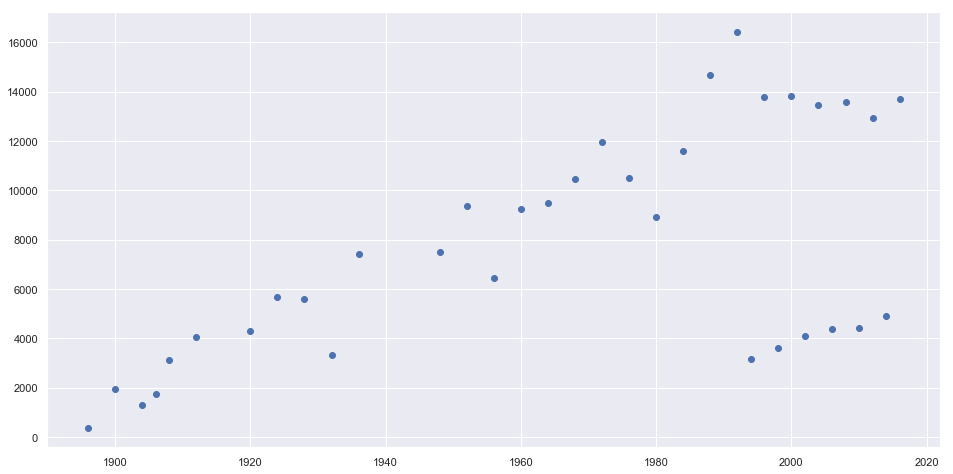

In [31]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Year", y = "No of atheletes", data = data_table)

In [38]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20     # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(data_table)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

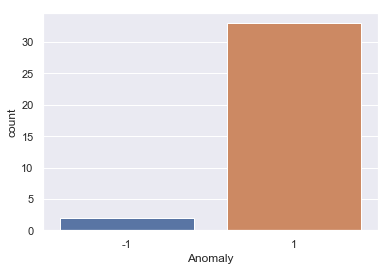

In [39]:
# Predict the Anomalies
labels = lof.fit_predict(data_table)

# Append Labels to the Data
X_labeled = data_table.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

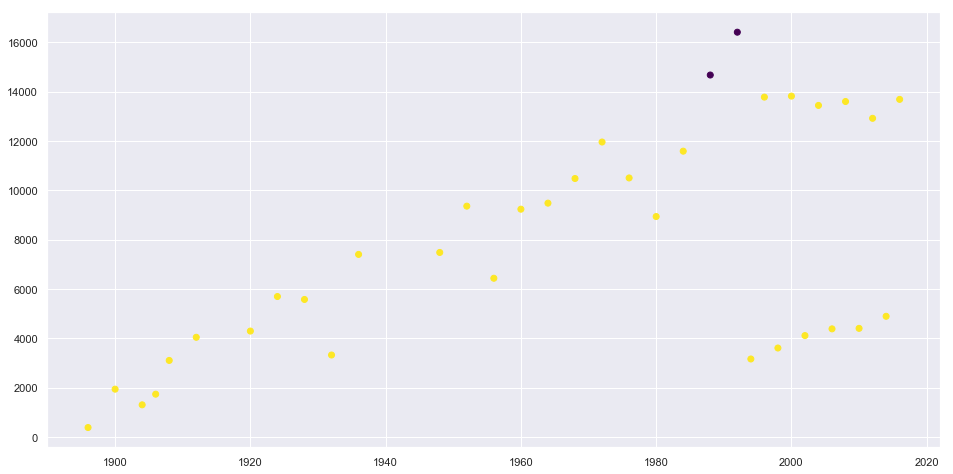

In [40]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Year", y = "No of atheletes", c = "Anomaly", cmap = 'viridis', data = X_labeled)

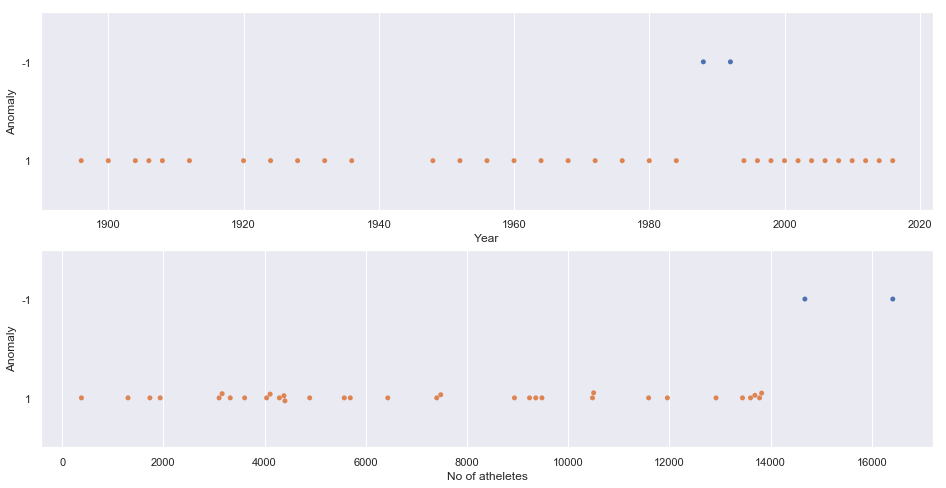

In [41]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.swarmplot(x = 'Year', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.swarmplot(x = 'No of atheletes', y = 'Anomaly', data = X_labeled, ax = axes[1])